In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

#Import API key
from Config import weather_API

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output file (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



### Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
sample_city = cities[1]

### Perform API Calls
    - Perform a weather check on each city using a series of successive API calls.
    - Include a print log of each city as it's being processed (with the city number and city name).

In [ ]:
# build url for open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_API}&units={units}&q="

#make request to open weather
weather_json = requests.get(query_url + sample_city).json()
pprint(weather_json)
weather_json.keys()
this_name = weather_json['name']
this_temp = weather_json['main']['temp']
this_lat = weather_json['coord']['lat']
this_humidity = weather_json['main']['humidity']
this_cloudiness = weather_json['clouds']['all']
this_wspeed = weather_json['wind']['speed']
# print(f"lets see if this worked. The city name is {this_name}. The temp is {this_temp}. \
#     lat: {this_lat} \
#     humidity: {this_humidity} \
#     cloudiness: {this_cloudiness} \
#     wind speed: {this_wspeed}")


In [ ]:
# build url for open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_API}&units={units}&q="

#make request to open weather


# set up lists to hold reponse info
good_cities = []
country = []
temp = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
bad_cities = []

# Construct for loop to get all necessary information for each city
for city in cities:
    #make a try/except because there is sometimes a key error
    try:
        #make comment letting you know what city it's working on
        print(f'Pulling information for {city}!')

        #make call to Open Weather API
        weather_json = requests.get(query_url + city).json()

        #append temp of each city
        temp.append(weather_json['main']['temp'])

        #append lat for each city
        lat.append(weather_json['coord']['lat'])

        #append lng for each city
        lng.append(weather_json['coord']['lon'])

        #append humidity for each city
        humidity.append(weather_json['main']['humidity'])

        #append cloudiness
        cloudiness.append(weather_json['clouds']['all'])

        #append wind speed
        wind_speed.append(weather_json['wind']['speed'])

        #append country
        country.append(weather_json['sys']['country'])
        
        #append good city
        good_cities.append(city)
         
        
    except KeyError:
        #append the bad city to list so we can remove that later from dataframe
        bad_cities.append(city)
        
        print(f'skipping {city} due to key error!')

In [3]:
# # lets make a dictionary to store this info
# weather_dict = {'city': good_cities,
#                    'country': country,
#                    'Lat': lat,
#                    'Lng': lng,
#                    'Temperature': temp,
#                    'Humidity': humidity,
#                    'Cloudiness': cloudiness,
#                    'Wind Speed': wind_speed}
# weather_df = pd.DataFrame(weather_dict)
# #export this dataframe to a csv
# weather_df.to_csv('random_city_weather.csv', index=False)
saved_df = pd.read_csv('random_city_weather.csv')
saved_df

,city,country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,-53.1500,-70.9167,46.20,81,90,19.57
1,busselton,AU,-33.6500,115.3333,78.51,48,0,4.00
2,ilulissat,GL,69.2167,-51.1000,-0.40,55,0,4.61
3,atuona,PF,-9.8000,-139.0333,78.46,80,11,17.34
4,sao jose da coroa grande,BR,-8.8978,-35.1478,77.88,83,100,11.10
...,...,...,...,...,...,...,...,...
581,west wendover,US,40.7391,-114.0733,39.20,65,90,8.05
582,bonthe,SL,7.5264,-12.5050,77.20,88,3,3.74
583,manokwari,ID,-0.8667,134.0833,83.10,64,89,2.86
584,casper,US,42.8666,-106.3131,37.20,52,1,12.66


In [4]:
#describe the data - found no cities with humidity over 100%
saved_df.describe()

,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.00000
mean,20.127012,25.034663,48.168993,73.383959,49.590444,8.26384
std,32.971875,87.706748,33.009695,19.336366,40.435825,6.00022
min,-54.800000,-175.200000,-43.280000,1.000000,0.000000,0.04000
25%,-6.220825,-50.157175,26.532500,64.000000,1.000000,3.49000
50%,23.971700,26.789300,59.305000,78.000000,44.000000,6.91000
75%,47.552475,102.276150,74.865000,88.000000,90.000000,11.24500
max,78.218600,179.316700,102.200000,100.000000,100.000000,31.07000


### Latitude vs Temperature Scatter Plot

- This scatter plot will allow us to visualize how temperature changes with latitude

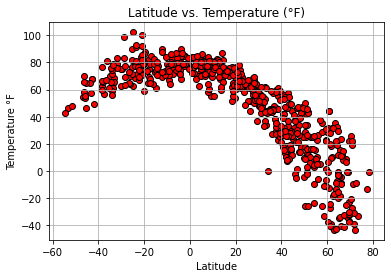

In [10]:
#gather values to enter into the scatter plot
lat_values = saved_df['Lat']
temp_values = saved_df['Temperature']
#plot scatter 
plt.scatter(lat_values, temp_values, marker='o', facecolors='red', edgecolors='black')
#Label the graph
plt.title("Latitude vs. Temperature (°F)")
plt.ylabel('Temperature °F')
plt.xlabel('Latitude')
plt.grid()

### Latitide VS Humidity Scatter Plot

    - This scatter plot will allow us to visualize if there is a relationship between Latitude and Humidity

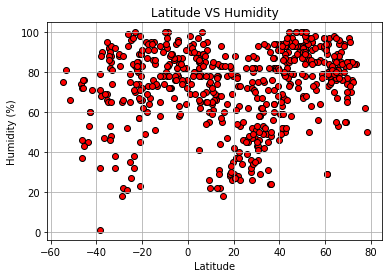

In [13]:
#define variables for scatter plot
humidity_values = saved_df['Humidity']
lat_values = saved_df['Lat']
#plot scatter
plt.scatter(lat_values, humidity_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Latitude VS Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

 ### Latitude vs Cloudiness Scatter Plot
 
     - This scatter plot will allow us to visualize the relationship between Cloudiness and Latitude
    

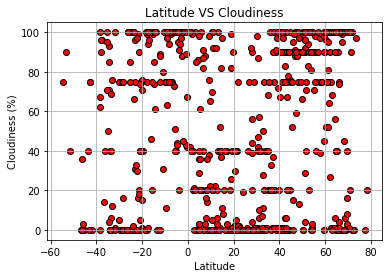

In [14]:
#define variables for scatter plot
cloudiness_values = saved_df['Cloudiness']
lat_values = saved_df['Lat']
#plot scatter
plt.scatter(lat_values, cloudiness_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Latitude VS Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

### Latitude VS Wind Speed Scatter Plot

    - This scatter plot will allow us to visualize the relationship between wind speed and latitude.

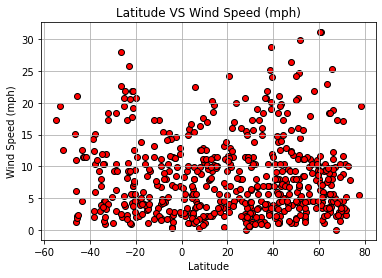

In [15]:
#define variables for scatter plot
wspeed_values = saved_df['Wind Speed']
lat_values = saved_df['Lat']
#plot scatter
plt.scatter(lat_values, wspeed_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Latitude VS Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

## Linear Regression


In [21]:
#split up saved_df DF into Northern and Southern hemisphere by .loc on "Lat"
northern_hemi_df = saved_df.loc[saved_df['Lat'] >= 0, :]
southern_hemi_df = saved_df.loc[saved_df['Lat'] < 0, :]


,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,-21.657035,33.841349,73.807069,73.879310,56.362069,8.192356
std,13.172781,95.225540,10.103135,18.749099,39.395152,5.939296
min,-54.800000,-175.200000,42.800000,1.000000,0.000000,0.380000
25%,-33.014400,-50.157175,67.625000,66.000000,12.500000,3.530000
50%,-21.100000,22.269700,75.200000,78.000000,73.500000,6.855000
75%,-9.891675,134.033300,80.115000,88.000000,96.000000,11.500000
max,-0.413900,175.700000,102.200000,100.000000,100.000000,28.010000


####   Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.7709721485180255


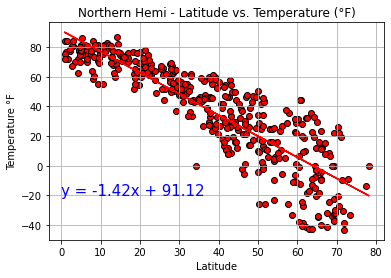

In [57]:
#gather values to enter into the scatter plot
lat_values = northern_hemi_df['Lat']
temp_values = northern_hemi_df['Temperature']
#plot scatter 
plt.scatter(lat_values, temp_values, marker='o', facecolors='red', edgecolors='black')
#Label the graph
plt.title("Northern Hemi - Latitude vs. Temperature (°F)")
plt.ylabel('Temperature °F')
plt.xlabel('Latitude')
plt.grid()
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(0, -20),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.32869452014208933


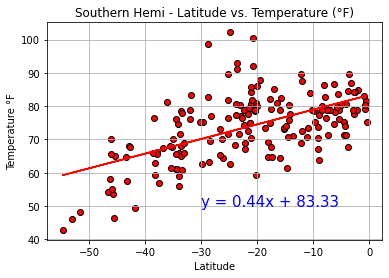

In [66]:
#gather values to enter into the scatter plot
lat_values = southern_hemi_df['Lat']
temp_values = southern_hemi_df['Temperature']
#plot scatter 
plt.scatter(lat_values, temp_values, marker='o', facecolors='red', edgecolors='black')
#Label the graph
plt.title("Southern Hemi - Latitude vs. Temperature (°F)")
plt.ylabel('Temperature °F')
plt.xlabel('Latitude')
plt.grid()
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

#### Observations from Latitude vs Temperature in both hemispheres

    - Northern Hemisphere: r-value(.77) signals there is a strong relationship between latitude and temperature. As latitude decreases and gets closer to the equator the temperature rises.
    - Southern Hemisphere: r-value(.33) signals there is a weak relationship beween latitude and temperature. However I think this relationship was skewed weaker due to less data points on this graph than on the northern hemisphere graph.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08487944942931051


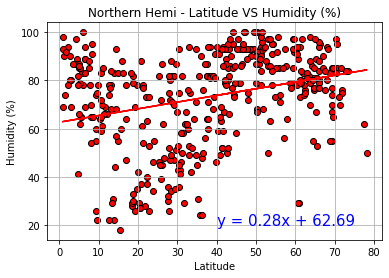

In [42]:
#define variables for scatter plot
humidity_values = northern_hemi_df['Humidity']
lat_values = northern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, humidity_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Northern Hemi - Latitude VS Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
#plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(40, 20),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

 #### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08348674559392986


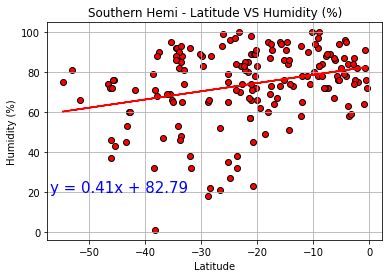

In [56]:
#define variables for scatter plot
humidity_values = southern_hemi_df['Humidity']
lat_values = southern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, humidity_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Southern Hemi - Latitude VS Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
#plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(-57, 20),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

#### Observations from Latitude vs Humidity in both hemispheres

    - r-value signals there is no relationship here between humidity and latitude with a value of less than .1 in both hemispheres. 

 #### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07934073786010314


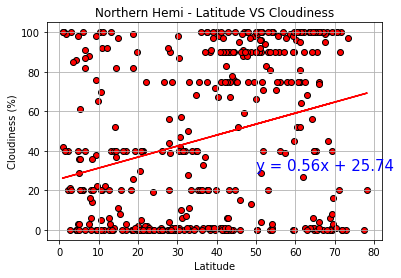

In [55]:
#define variables for scatter plot
cloudiness_values = northern_hemi_df['Cloudiness']
lat_values = northern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, cloudiness_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Northern Hemi - Latitude VS Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, cloudiness_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(50, 30),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15188251356065607


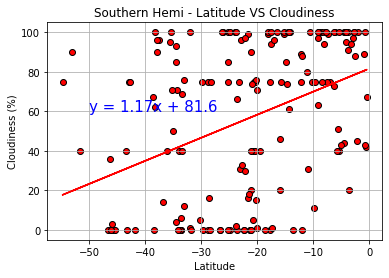

In [54]:
#define variables for scatter plot
cloudiness_values = southern_hemi_df['Cloudiness']
lat_values = southern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, cloudiness_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Southern Hemi - Latitude VS Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, cloudiness_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(-50, 60),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

#### Observations from Latitude vs Cloudiness in both hemispheres
- r-value signals there is no relationship here between humidity and latitude in both hemispheres with values both below .15. I did not expect to see a relationship here as cloudiness is not usually associated with a location's latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002590192119216444


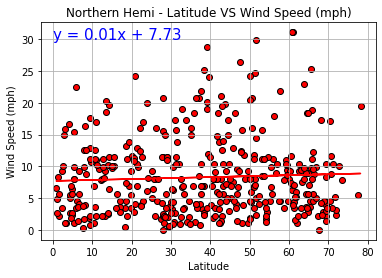

In [64]:
#define variables for scatter plot
wspeed_values = northern_hemi_df['Wind Speed']
lat_values = northern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, wspeed_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Northern Hemi - Latitude VS Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wspeed_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(0, 30),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

 #### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013109566897550894


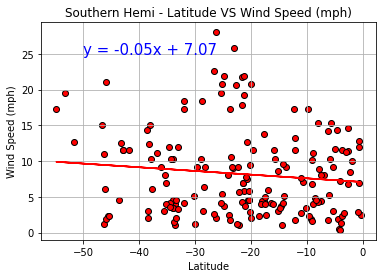

In [63]:
#define variables for scatter plot
wspeed_values = southern_hemi_df['Wind Speed']
lat_values = southern_hemi_df['Lat']
#plot scatter
plt.scatter(lat_values, wspeed_values, marker='o', facecolors='red', edgecolors='black')
#plot labels
plt.title('Southern Hemi - Latitude VS Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wspeed_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_values ,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

#### Observations from Latitude vs Wind Speed in both hemispheres
- r-value signals there is no relationship here between wind speed and latitude with a value of less than .1 in both hemispheres. No relationship was expected here as wind speed is not normally associated with a location's latitude.